# AED 1 🤓

## 1) Cargamos los datos 📕

In [1]:
# Pandas profiling lo hice en Colab, me instalaba otras dependencias a las que tengo y me rompio el proyecto
# https://colab.research.google.com/drive/1oBoFTxfQzrl_EHfAo6921y3AQ3tp-Qn0?usp=sharing

In [2]:
import pandas as pd
data=pd.read_csv("data/customer_dataset.csv", sep = ",")

### Variables categóricas 

In [3]:
#creo que esto corresponde a la 4) de Graficos en AED
# pero como esta aqui ya lo analice, luego lo graficare

In [4]:
from funpymodeling import freq_tbl

In [5]:
# Analicen `paymentMethodType`
# Para la creación de la query consideren evaluar: `"frequency<=30"`
paymentMethodTypeUnder30=freq_tbl(data['paymentMethodType'])
paymentMethodTypeUnder30.query("frequency<=30")['paymentMethodType']

3    bitcoin
Name: paymentMethodType, dtype: object

In [6]:
# Prefiero hacerlo de este modo
freq_tbl(data['paymentMethodType'])

,paymentMethodType,frequency,percentage,cumulative_perc
0,card,242,0.388443,0.707602
1,apple pay,36,0.057785,0.812865
2,paypal,36,0.057785,0.918129
3,bitcoin,28,0.044944,1.000000


In [7]:
paymentMethodTypeLowFrequency = data['paymentMethodType'].value_counts()
paymentMethodTypeLowFrequency = paymentMethodTypeLowFrequency[paymentMethodTypeLowFrequency < 30]
paymentMethodTypeLowFrequency

paymentMethodType
bitcoin    28
Name: count, dtype: int64

In [8]:
# yo usaria >= 40
paymentMethodTypeLowFrequency2 = data['paymentMethodType'].value_counts()
paymentMethodTypeLowFrequency2 = paymentMethodTypeLowFrequency2[paymentMethodTypeLowFrequency2 <= 40]
paymentMethodTypeLowFrequency2

paymentMethodType
apple pay    36
paypal       36
bitcoin      28
Name: count, dtype: int64

# AED 2 😧

## 1) Análisis de variables categóricas

### Analicen `fraudulent`

In [9]:
data['fraudulent']

0      False
1       True
2      False
3      False
4       True
       ...  
618      NaN
619      NaN
620      NaN
621      NaN
622      NaN
Name: fraudulent, Length: 623, dtype: object

In [10]:
freq_tbl(data['fraudulent'])

,fraudulent,frequency,percentage,cumulative_perc
0,False,107,0.171750,0.636905
1,True,61,0.097913,1.000000


In [11]:
data['fraudulent'].value_counts(dropna=False)

fraudulent
NaN      455
False    107
True      61
Name: count, dtype: int64

##### Debemos resolver como tratamos esos datos nulos

###### dado lo que nos adelanto Carlos, los nulos se convertiran en Warning

### quiero inspeccionar los datos que son True

In [12]:
fraudelentYes = data[data['fraudulent']==True]
fraudelentYes

,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAddressSimplified,sameCity
1,26.0,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,26,False,True,com,yahoo,only_letters,no
4,43.0,fulfilled,False,card,Mastercard,Vertex Bancorp,43,True,True,com,other,only_letters,no
5,33.0,failed,False,bitcoin,American Express,Bastion Banks,33,False,True,com,other,only_letters,no
6,24.0,fulfilled,False,card,Maestro,Her Majesty Trust,24,True,True,com,other,only_letters,no
7,25.0,fulfilled,False,card,JCB 16 digit,Fountain Financial Inc.,24,False,True,com,gmail,only_letters,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,48.0,failed,True,apple pay,VISA 16 digit,Bulwark Trust Corp.,47,False,True,com,other,digits_and_letters,no
163,29.0,fulfilled,False,card,VISA 13 digit,Fountain Financial Inc.,39,False,True,com,other,only_letters,no
164,22.0,fulfilled,False,apple pay,VISA 13 digit,Vertex Bancorp,18,True,True,biz,other,only_letters,no
165,44.0,fulfilled,False,card,Discover,c,18,False,True,com,gmail,digits_and_letters,no


In [13]:
for column in fraudelentYes.columns:
    value_counts = fraudelentYes[column].value_counts()
    print(f"\n Cantidad en '{column}':\n{value_counts}")


 Cantidad en 'orderAmount':
orderAmount
29.0    4
25.0    4
46.0    3
43.0    3
39.0    3
30.0    3
34.0    2
18.0    2
36.0    2
48.0    2
31.0    2
42.0    2
26.0    2
44.0    2
16.0    2
12.0    2
35.0    2
24.0    2
33.0    1
15.0    1
60.0    1
50.0    1
21.0    1
40.0    1
20.0    1
49.0    1
58.0    1
65.0    1
68.0    1
10.0    1
45.0    1
19.0    1
74.0    1
14.0    1
22.0    1
Name: count, dtype: int64

 Cantidad en 'orderState':
orderState
fulfilled    51
failed        9
pending       1
Name: count, dtype: int64

 Cantidad en 'paymentMethodRegistrationFailure':
paymentMethodRegistrationFailure
False    56
True      5
Name: count, dtype: int64

 Cantidad en 'paymentMethodType':
paymentMethodType
card         46
apple pay     7
bitcoin       6
paypal        2
Name: count, dtype: int64

 Cantidad en 'paymentMethodProvider':
paymentMethodProvider
VISA 16 digit                  13
JCB 16 digit                   12
VISA 13 digit                   7
Discover                       

In [14]:
# quiero quedarme con los datos mas representativos
for column in fraudelentYes.columns:
    value_counts = fraudelentYes[column].value_counts()
    filtered_counts = value_counts[value_counts > 7]
    if not filtered_counts.empty:
        print(f"\n Cantidad en '{column}':\n{filtered_counts}")


 Cantidad en 'orderState':
orderState
fulfilled    51
failed        9
Name: count, dtype: int64

 Cantidad en 'paymentMethodRegistrationFailure':
paymentMethodRegistrationFailure
False    56
Name: count, dtype: int64

 Cantidad en 'paymentMethodType':
paymentMethodType
card    46
Name: count, dtype: int64

 Cantidad en 'paymentMethodProvider':
paymentMethodProvider
VISA 16 digit    13
JCB 16 digit     12
Name: count, dtype: int64

 Cantidad en 'paymentMethodIssuer':
paymentMethodIssuer
Fountain Financial Inc.    11
Vertex Bancorp             10
Citizens First Banks        8
Name: count, dtype: int64

 Cantidad en 'transactionFailed':
transactionFailed
False    44
True     17
Name: count, dtype: int64

 Cantidad en 'fraudulent':
fraudulent
True    61
Name: count, dtype: int64

 Cantidad en 'emailDomain':
emailDomain
com    46
Name: count, dtype: int64

 Cantidad en 'emailProvider':
emailProvider
other    30
gmail    15
Name: count, dtype: int64

 Cantidad en 'customerIPAddressSimplifie

In [15]:
from funpymodeling.exploratory import cat_vars, num_vars

#### Lo mas relevante:
#### la mayoria de los casos no coincide la ciudad donde se compra que donde se registro el usuario


In [16]:
# Hagamos lo mismo con los valores False y NaN
fraudelentNo = data[data['fraudulent']==False]
for column in fraudelentNo.columns:
    value_counts = fraudelentNo[column].value_counts()
    filtered_counts = value_counts[value_counts > 7]
    if not filtered_counts.empty:
        print(f"\n Cantidad en '{column}':\n{filtered_counts}")


 Cantidad en 'orderState':
orderState
fulfilled    86
failed       11
pending      10
Name: count, dtype: int64

 Cantidad en 'paymentMethodRegistrationFailure':
paymentMethodRegistrationFailure
False    92
True     15
Name: count, dtype: int64

 Cantidad en 'paymentMethodType':
paymentMethodType
card         75
paypal       12
apple pay    11
bitcoin       9
Name: count, dtype: int64

 Cantidad en 'paymentMethodProvider':
paymentMethodProvider
VISA 16 digit                  24
JCB 16 digit                   19
Diners Club / Carte Blanche    11
Maestro                        10
VISA 13 digit                   9
American Express                8
Voyager                         8
Discover                        8
Name: count, dtype: int64

 Cantidad en 'paymentMethodIssuer':
paymentMethodIssuer
Her Majesty Trust         15
Vertex Bancorp            13
Solace Banks              12
Rose Bancshares           12
His Majesty Bank Corp.    11
Bastion Banks              9
Citizens First Banks 

#### Bueno, me perdi, sameCity 85 que no. Cual es el total de casos sameCtiy

In [17]:
data['sameCity'].value_counts()

sameCity
unknown    484
no         137
yes          2
Name: count, dtype: int64

#### a ver que pasa con los casos nulos

In [18]:
fraudelentNaN = data[data['fraudulent'].isna()]
for column in fraudelentNaN.columns:
    value_counts = fraudelentNaN[column].value_counts()
    filtered_counts = value_counts[value_counts > 7]
    if not filtered_counts.empty:
        print(f"\n\tCantidad en '{column}':\n{filtered_counts}")


	Cantidad en 'orderAmount':
orderAmount
46.0    14
47.0    11
14.0    10
35.0    10
22.0    10
36.0     9
34.0     9
16.0     9
11.0     9
12.0     8
30.0     8
43.0     8
45.0     8
49.0     8
40.0     8
Name: count, dtype: int64

	Cantidad en 'orderState':
orderState
fulfilled    263
failed        30
pending       17
Name: count, dtype: int64

	Cantidad en 'paymentMethodRegistrationFailure':
paymentMethodRegistrationFailure
False    154
True      20
Name: count, dtype: int64

	Cantidad en 'paymentMethodType':
paymentMethodType
card         121
paypal        22
apple pay     18
bitcoin       13
Name: count, dtype: int64

	Cantidad en 'paymentMethodProvider':
paymentMethodProvider
JCB 16 digit                   34
Voyager                        23
Diners Club / Carte Blanche    21
VISA 16 digit                  20
Maestro                        17
VISA 13 digit                  16
JCB 15 digit                   12
Discover                       11
Mastercard                     11
Ame

#### sameCity todo desconocido y los IP como los mails son weird

## 2) Análisis bivariado

### 2.A) Análisis de categórica vs. categórica

In [19]:
pd.crosstab(data['fraudulent'], data['transactionFailed'])

transactionFailed,False,True
fraudulent,,
False,73,34
True,44,17


In [20]:
# en porcentaje
pd.crosstab(data['fraudulent'], data['transactionFailed'], normalize='index', margins=True)

transactionFailed,False,True
fraudulent,,
False,0.682243,0.317757
True,0.721311,0.278689
All,0.696429,0.303571


### 2.B) Análisis de numérica vs. categórica

In [21]:
data.groupby('fraudulent')['transactionAmount'].mean()

fraudulent
False    33.373832
True     30.950820
Name: transactionAmount, dtype: float64

In [22]:
data.groupby('transactionAmount')['fraudulent'].describe()

,count,unique,top,freq
transactionAmount,,,,
10,6,2,False,4
11,8,2,False,7
12,8,2,True,6
13,0,0,NaN,NaN
14,8,2,False,7
...,...,...,...,...
72,0,0,NaN,NaN
73,0,0,NaN,NaN
74,1,1,False,1


In [23]:
data.groupby('fraudulent')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
fraudulent,,,,,,,,
False,107.0,33.373832,16.519584,10.0,20.5,33.0,44.5,75.0
True,61.0,30.950820,14.548111,10.0,19.0,29.0,42.0,69.0


### 2.C) Análisis de numérica vs numérica

In [24]:
data.groupby('orderAmount')['transactionAmount'].mean()

orderAmount
10.0     49.875000
11.0     37.466667
12.0     37.571429
13.0     30.500000
14.0     35.857143
           ...    
72.0     43.250000
73.0     22.500000
74.0     35.250000
75.0     33.000000
353.0    10.000000
Name: transactionAmount, Length: 67, dtype: float64

In [25]:
#Hay un 353 raro ahi

In [26]:
data.groupby('orderAmount')['transactionAmount'].mean().sort_values(ascending=False)

orderAmount
69.0     71.000000
25.0     61.750000
10.0     49.875000
67.0     47.333333
42.0     43.900000
           ...    
57.0     19.333333
53.0     18.000000
60.0     18.000000
63.0     10.000000
353.0    10.000000
Name: transactionAmount, Length: 67, dtype: float64

In [27]:
data.groupby('orderAmount')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
orderAmount,,,,,,,,
10.0,8.0,49.875000,17.183360,31.0,36.25,44.0,66.25,74.0
11.0,15.0,37.466667,19.671831,11.0,19.00,41.0,46.50,75.0
12.0,14.0,37.571429,13.200899,21.0,26.75,35.0,46.75,64.0
13.0,6.0,30.500000,12.973049,11.0,22.00,37.5,39.50,40.0
14.0,14.0,35.857143,16.505743,14.0,22.25,38.5,44.50,72.0
...,...,...,...,...,...,...,...,...
72.0,4.0,43.250000,16.660832,19.0,40.75,48.5,51.00,57.0
73.0,2.0,22.500000,2.121320,21.0,21.75,22.5,23.25,24.0
74.0,4.0,35.250000,22.276669,11.0,26.75,32.5,41.00,65.0


In [28]:
#hay un 353 en orderAmount

In [29]:
#data.groupby('transactionAmount').mean()

In [30]:
from funpymodeling import status
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


In [31]:
data['transactionAmount'].mean()

34.59871589085072

In [32]:
# Son todos valores object, creo que el error viene por ahi

## 3) Gráficos en AED

### 3.A) Análisis de numérica vs. categórica

/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

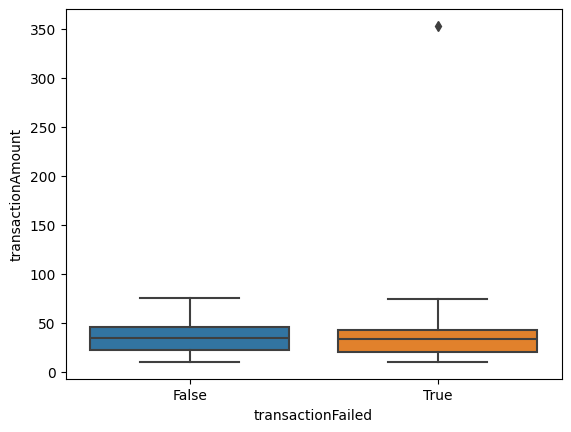

In [33]:
import seaborn as sns

sns.boxplot(y = 'transactionAmount', x = 'transactionFailed', data = data)

/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

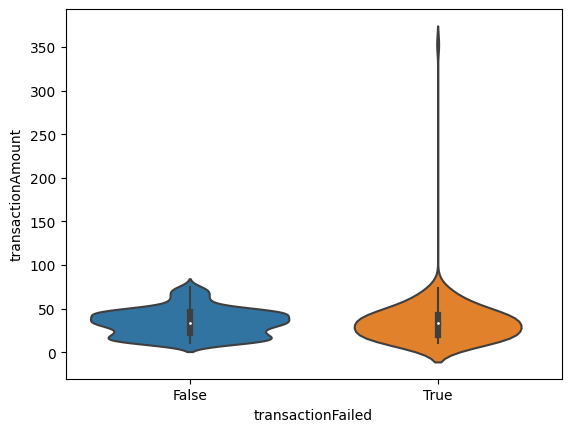

In [34]:
#esa punto me hace enanos mis graficos
sns.violinplot(y='transactionAmount', x = 'transactionFailed', data = data)

In [35]:
#esa raya del violin deforma todo
data['transactionAmount'].max()

353

In [36]:
data['transactionAmount'].mean()

34.59871589085072

In [37]:
a_ver = data[data['transactionAmount']==353]
a_ver

,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAddressSimplified,sameCity
189,25.0,fulfilled,True,apple pay,Voyager,Bastion Banks,353,True,NaN,weird,weird,only_letters,unknown


In [38]:
data['transactionFailed'].unique()

array([False,  True])

In [39]:
data['transactionFailed'].value_counts()

transactionFailed
False    455
True     168
Name: count, dtype: int64

In [40]:
sin353 = data[data['transactionAmount'] != 353]
status(sin353)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.233119,0,0.000000,67,float64
1,orderState,145,0.233119,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451768,302,0.485531,2,object
3,paymentMethodType,281,0.451768,0,0.000000,4,object
4,paymentMethodProvider,281,0.451768,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451768,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,66,int64
7,transactionFailed,0,0.000000,455,0.731511,2,bool
8,fraudulent,454,0.729904,107,0.172026,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

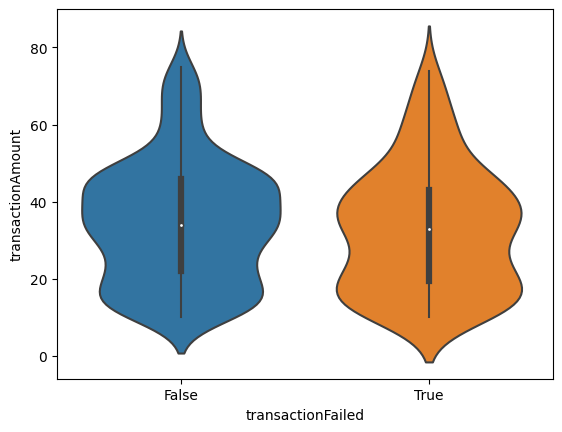

In [41]:
sns.violinplot(y='transactionAmount', x = 'transactionFailed', data = sin353)

/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

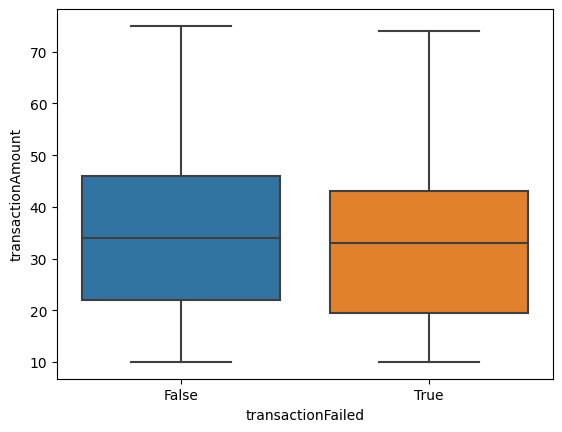

In [59]:
sns.boxplot(y='transactionAmount', x = 'transactionFailed', data = sin353)

### 3.B) Análisis de categórica vs. categórica

/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

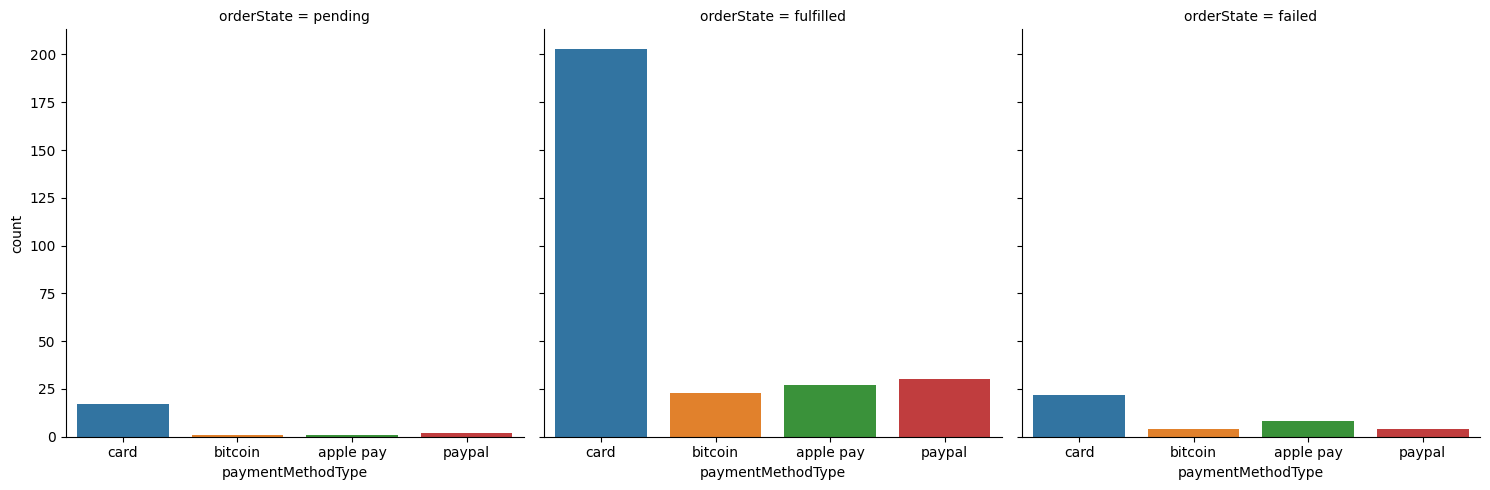

In [42]:
g = sns.catplot(x="paymentMethodType",
                col="orderState",
                data= data,
                kind="count")

### 3.C) Análisis de numérica vs. numérica

In [43]:
#sns.pairplot(data)

In [44]:
data_aux = data[["orderAmount", "transactionAmount"]].copy()

/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is de

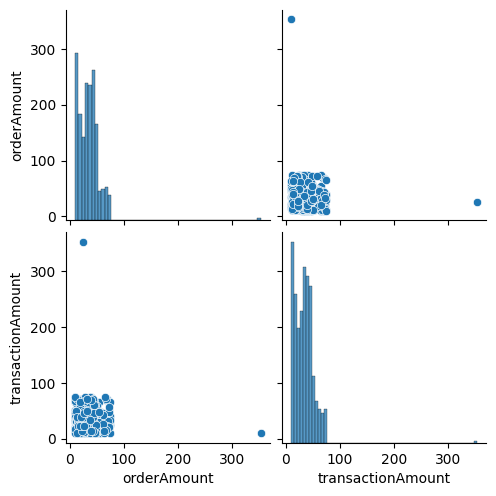

In [45]:
sns.pairplot(data_aux)

/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

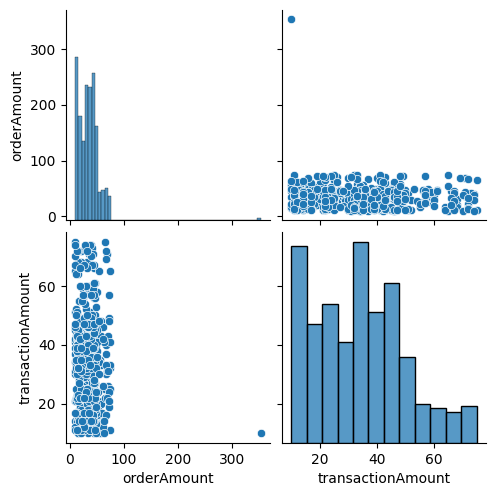

In [46]:
data_aux = sin353[["orderAmount", "transactionAmount"]].copy()
sns.pairplot(data_aux)

In [47]:
# ese 353 de orderAmount
qqq = data[data['orderAmount']>300]
qqq

,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAddressSimplified,sameCity
139,353.0,fulfilled,True,card,Maestro,Citizens First Banks,10,False,False,com,other,digits_and_letters,no


In [48]:
sin353b = sin353[sin353['orderAmount'] != 353]
status(sin353b)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.233494,0,0.000000,66,float64
1,orderState,145,0.233494,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.452496,302,0.486312,2,object
3,paymentMethodType,281,0.452496,0,0.000000,4,object
4,paymentMethodProvider,281,0.452496,0,0.000000,10,object
5,paymentMethodIssuer,281,0.452496,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,66,int64
7,transactionFailed,0,0.000000,454,0.731079,2,bool
8,fraudulent,454,0.731079,106,0.170692,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

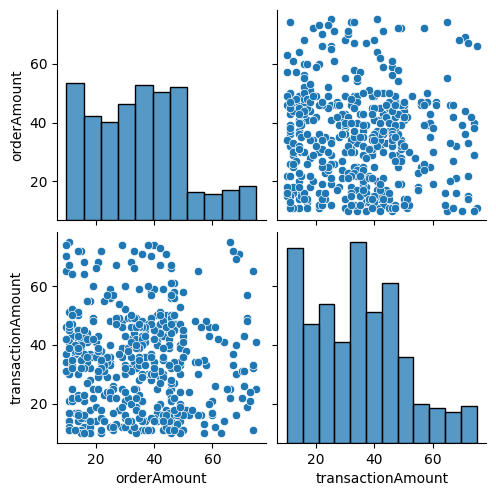

In [49]:
data_aux = sin353b[["orderAmount", "transactionAmount"]].copy()
sns.pairplot(data_aux)

# CORRELACIÓN 🤯

## 1) Samples

#### Como tenemos pocas columnas / filas no es necesario tomar una muestra / sample del dataset completo.   🤷‍♂️

Volvemos al análisis de correlación: Gráficos 📊

## 4) Variables categóricas

In [50]:
import matplotlib.pyplot as plt

/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


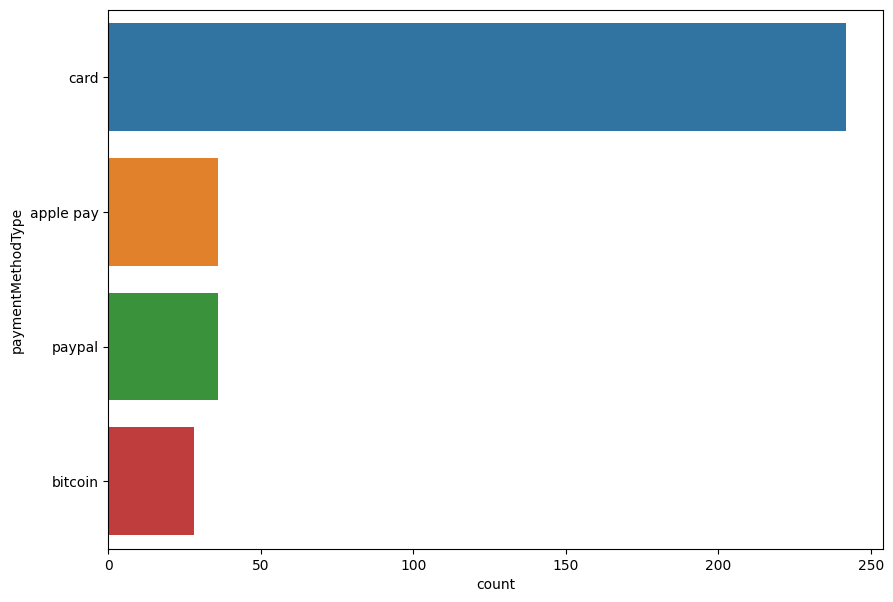

In [51]:
plt.figure(figsize=(10,7))
sns.countplot(y=data['paymentMethodType'], order = data['paymentMethodType'].value_counts().index)
plt.show()

/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


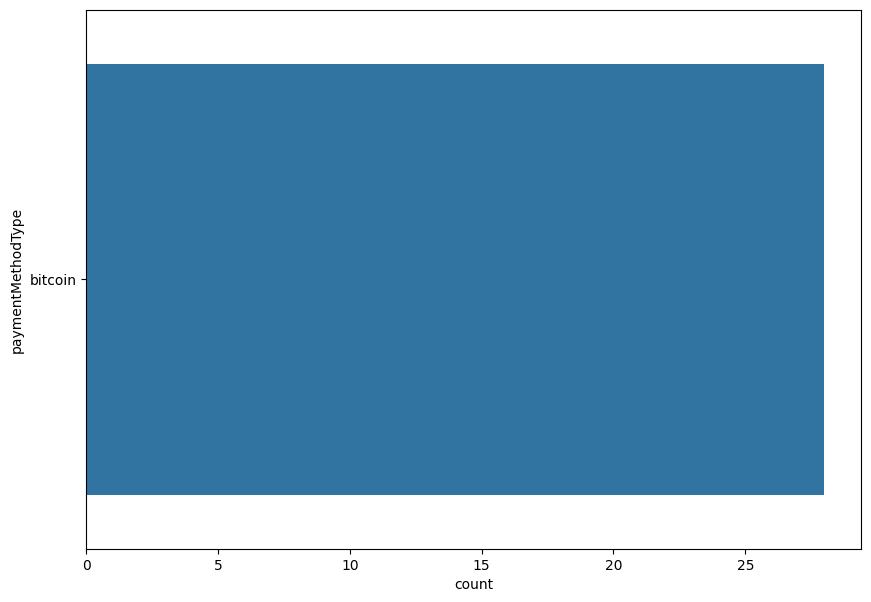

In [52]:
# Ya tenemos creada esta serie paymentMethodType <=30
# Vamos a graficarla
plt.figure(figsize=(10,7))
sns.barplot(x=paymentMethodTypeLowFrequency, y=paymentMethodTypeLowFrequency.index)
plt.show()

/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicolas/Documents/EdVai/tpFinal/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


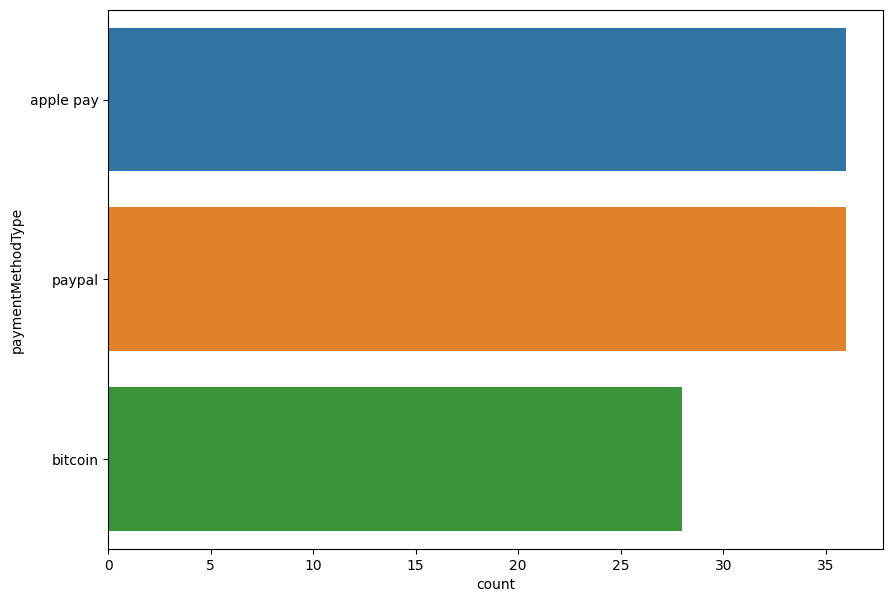

In [53]:
# Igual para paymentMethodType <=40
# Tiene mas sentido
plt.figure(figsize=(10,7))
sns.barplot(x=paymentMethodTypeLowFrequency2, y=paymentMethodTypeLowFrequency2.index)
plt.show()

## 5) Volvemos al análisis de correlación: Gráficos 📊

In [54]:
#d_cor=data.corr()

In [55]:
#Como no me funcionaba puse a prueba esta sugerencia de Atenea (ia y profe de EdVai)
numeric_data = data.select_dtypes(include='number')
d_cor = numeric_data.corr()
d_cor

,orderAmount,transactionAmount
orderAmount,1.000000,-0.077408
transactionAmount,-0.077408,1.000000


In [56]:
from funpymodeling.exploratory import corr_pair
cor_d=corr_pair(numeric_data)
cor_d

,v1,v2,R,R2
1,transactionAmount,orderAmount,-0.077408,0.005992
2,orderAmount,transactionAmount,-0.077408,0.005992


In [57]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


##### Preparo los datos para el heatmap, sacando las columnas de muchos valores unicos y haciendo un get dummies

In [61]:
data3 = data.drop(['orderAmount', 'paymentMethodProvider', 'paymentMethodIssuer', 'transactionAmount'], axis=1)
status(data3)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderState,145,0.232745,0,0.000000,3,object
1,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
2,paymentMethodType,281,0.451043,0,0.000000,4,object
3,transactionFailed,0,0.000000,455,0.730337,2,bool
4,fraudulent,455,0.730337,107,0.171750,2,object
5,emailDomain,0,0.000000,0,0.000000,6,object
6,emailProvider,0,0.000000,0,0.000000,5,object
7,customerIPAddressSimplified,0,0.000000,0,0.000000,2,object
8,sameCity,0,0.000000,0,0.000000,3,object


In [62]:
data3=pd.get_dummies(data3, dummy_na=True)
data3

,transactionFailed,orderState_failed,orderState_fulfilled,orderState_pending,orderState_nan,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodRegistrationFailure_nan,paymentMethodType_apple pay,paymentMethodType_bitcoin,...,emailProvider_weird,emailProvider_yahoo,emailProvider_nan,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,customerIPAddressSimplified_nan,sameCity_no,sameCity_unknown,sameCity_yes,sameCity_nan
0,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,False,False,True,False,False,False,True,False,False,True,...,False,True,False,False,True,False,True,False,False,False
2,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
3,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
4,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,True,False,False,False,True,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
619,True,False,False,False,True,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
620,False,False,False,False,True,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
621,False,False,False,False,True,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False


#### Heatmaps

<Axes: >

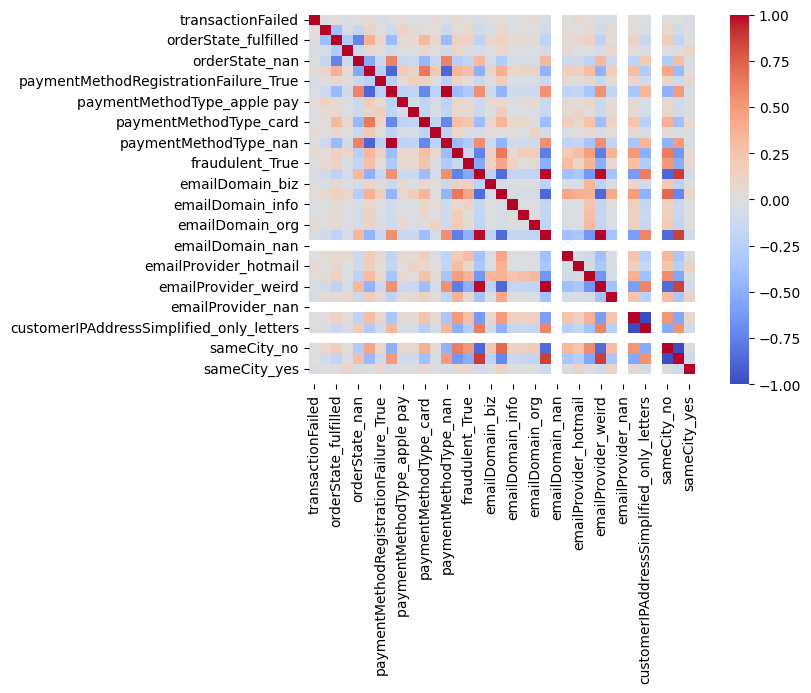

In [63]:
sns.heatmap(data3.corr(), cmap='coolwarm')

<Axes: >

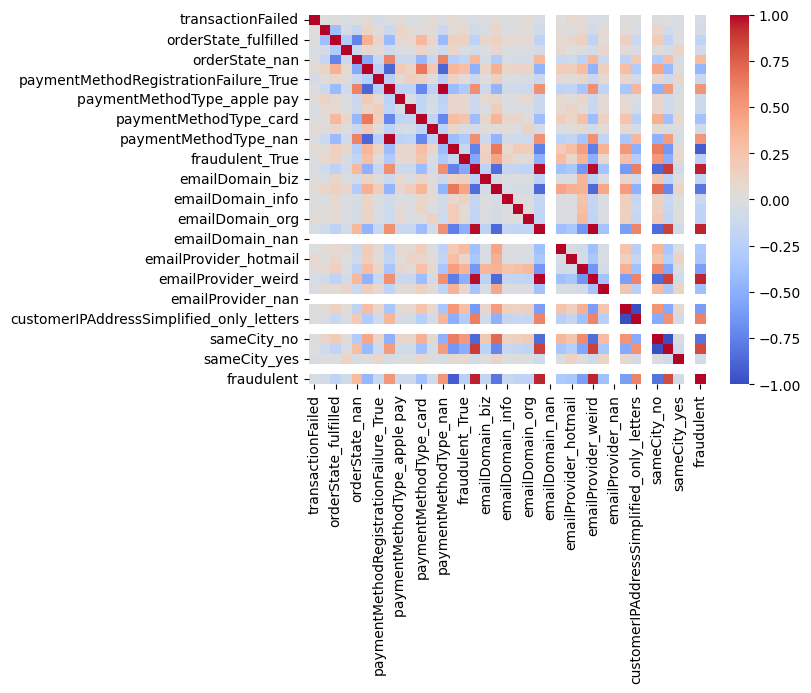

In [64]:
# Agrego la fila fraudelent para visualizar la correlacion con la columna unida

import numpy as np
data3['fraudulent'] = data['fraudulent']
data3['fraudulent'].replace({True: 1, False: 0, np.nan: 2}, inplace=True)
sns.heatmap(data3.corr(), cmap='coolwarm')

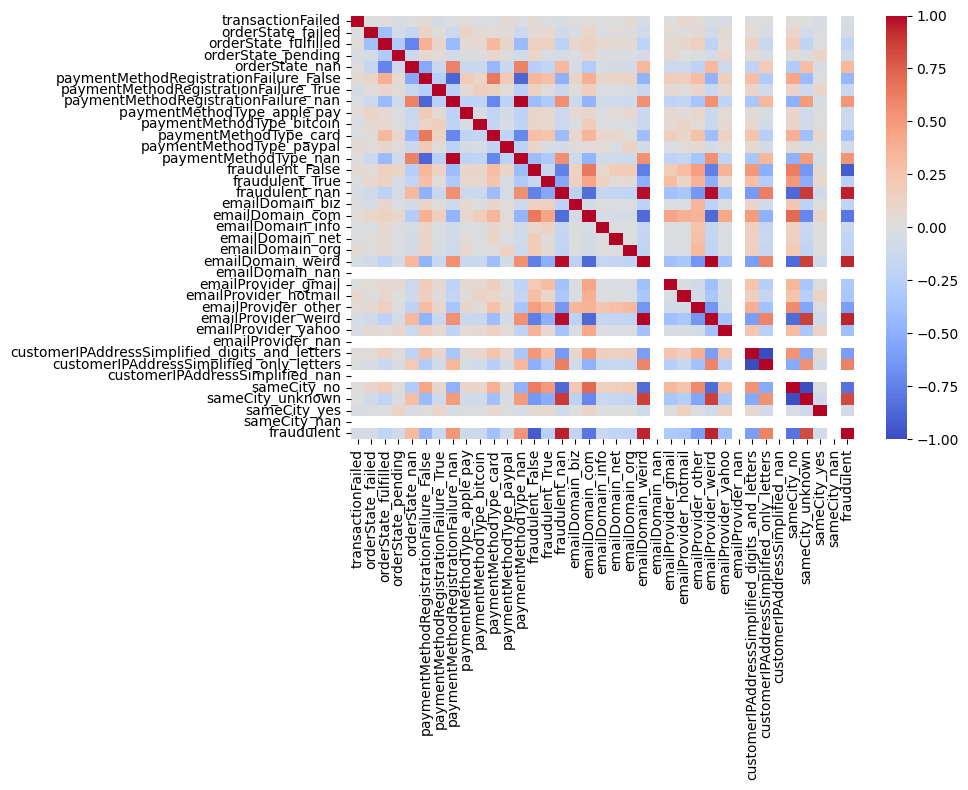

In [65]:
# Como no me aparecia el nombre de las 36 columnas modifique el figsize para que aparecan los nombres
plt.figure(figsize=(10, 8))  
heatmap = sns.heatmap(data3.corr(), cmap='coolwarm')
plt.tight_layout()

In [66]:
data3.columns

Index(['transactionFailed', 'orderState_failed', 'orderState_fulfilled',
       'orderState_pending', 'orderState_nan',
       'paymentMethodRegistrationFailure_False',
       'paymentMethodRegistrationFailure_True',
       'paymentMethodRegistrationFailure_nan', 'paymentMethodType_apple pay',
       'paymentMethodType_bitcoin', 'paymentMethodType_card',
       'paymentMethodType_paypal', 'paymentMethodType_nan', 'fraudulent_False',
       'fraudulent_True', 'fraudulent_nan', 'emailDomain_biz',
       'emailDomain_com', 'emailDomain_info', 'emailDomain_net',
       'emailDomain_org', 'emailDomain_weird', 'emailDomain_nan',
       'emailProvider_gmail', 'emailProvider_hotmail', 'emailProvider_other',
       'emailProvider_weird', 'emailProvider_yahoo', 'emailProvider_nan',
       'customerIPAddressSimplified_digits_and_letters',
       'customerIPAddressSimplified_only_letters',
       'customerIPAddressSimplified_nan', 'sameCity_no', 'sameCity_unknown',
       'sameCity_yes', 'sameCity

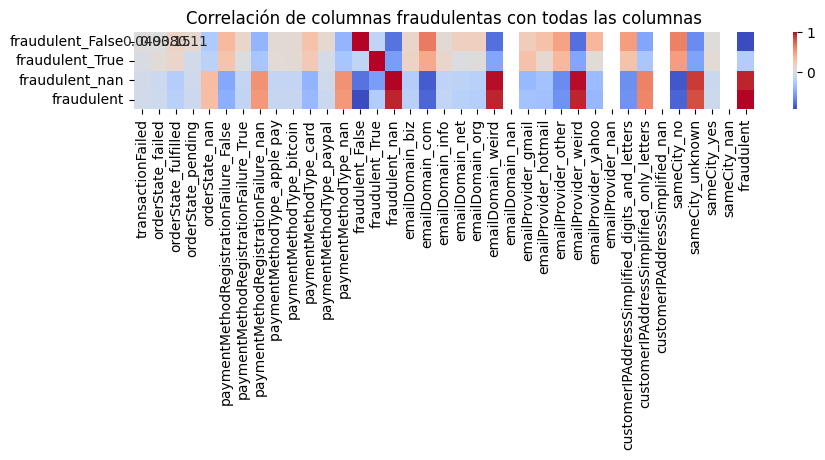

In [67]:
# Como solo me intersaba la correlacion de ciertas columnas reduje el eje y

plt.figure(figsize=(10, 1))  
columnas_interes = ['fraudulent_False', 'fraudulent_True', 'fraudulent_nan', 'fraudulent']

correlaciones = data3.corr().loc[columnas_interes]

heatmap = sns.heatmap(correlaciones, cmap='coolwarm', annot=True)

plt.title('Correlación de columnas fraudulentas con todas las columnas')
plt.show()

#### vuelvo a hacer .corr() pero con los datos del data frame con el que hice el heatmap

In [68]:
d_cor3=data3.corr()
d_cor3

,transactionFailed,orderState_failed,orderState_fulfilled,orderState_pending,orderState_nan,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodRegistrationFailure_nan,paymentMethodType_apple pay,paymentMethodType_bitcoin,...,emailProvider_yahoo,emailProvider_nan,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,customerIPAddressSimplified_nan,sameCity_no,sameCity_unknown,sameCity_yes,sameCity_nan,fraudulent
transactionFailed,1.000000,-0.006432,0.016107,-0.044527,0.007694,0.047489,-0.055873,-0.020173,0.035530,-0.027069,...,-0.031251,NaN,0.013583,-0.013583,NaN,0.009223,-0.004490,-0.034484,NaN,-0.051054
orderState_failed,-0.006432,1.000000,-0.395626,-0.064081,-0.162696,0.115406,0.019034,-0.125286,0.129402,0.049983,...,0.046904,NaN,0.032675,-0.032675,NaN,0.099918,-0.097124,-0.016764,NaN,-0.068676
orderState_fulfilled,0.016107,-0.395626,1.000000,-0.290535,-0.737645,0.375845,0.099959,-0.426724,0.055762,0.081168,...,0.037833,NaN,0.148142,-0.148142,NaN,0.194328,-0.191038,-0.016816,NaN,-0.202401
orderState_pending,-0.044527,-0.064081,-0.290535,1.000000,-0.119479,0.068628,0.038000,-0.087646,-0.020519,-0.009664,...,0.099170,NaN,0.036236,-0.036236,NaN,0.015763,-0.032618,0.124648,NaN,-0.087146
orderState_nan,0.007694,-0.162696,-0.737645,-0.119479,1.000000,-0.534221,-0.144267,0.607617,-0.136396,-0.119479,...,-0.121696,NaN,-0.206833,0.206833,NaN,-0.292423,0.295158,-0.031256,NaN,0.316493
paymentMethodRegistrationFailure_False,0.047489,0.115406,0.375845,0.068628,-0.534221,1.000000,-0.254066,-0.879207,0.200260,0.115135,...,0.166819,NaN,0.289580,-0.289580,NaN,0.431065,-0.429072,0.001732,NaN,-0.446099
paymentMethodRegistrationFailure_True,-0.055873,0.019034,0.099959,0.038000,-0.144267,-0.254066,1.000000,-0.237430,0.047389,0.164429,...,0.066458,NaN,0.100602,-0.100602,NaN,0.098086,-0.111288,0.100896,NaN,-0.147850
paymentMethodRegistrationFailure_nan,-0.020173,-0.125286,-0.426724,-0.087646,0.607617,-0.879207,-0.237430,1.000000,-0.224477,-0.196635,...,-0.200284,NaN,-0.340400,0.340400,NaN,-0.481263,0.485763,-0.051441,NaN,0.520876
paymentMethodType_apple pay,0.035530,0.129402,0.055762,-0.020519,-0.136396,0.200260,0.047389,-0.224477,1.000000,-0.053722,...,0.043241,NaN,0.053310,-0.053310,NaN,0.101039,-0.098607,-0.014054,NaN,-0.117396
paymentMethodType_bitcoin,-0.027069,0.049983,0.081168,-0.009664,-0.119479,0.115135,0.164429,-0.196635,-0.053722,1.000000,...,0.062394,NaN,0.083316,-0.083316,NaN,0.090586,-0.088444,-0.012311,NaN,-0.117404


In [69]:
cor_d3=corr_pair(data3)
cor_d3

,v1,v2,R,R2
1,orderState_failed,transactionFailed,-0.006432,0.000041
2,orderState_fulfilled,transactionFailed,0.016107,0.000259
3,orderState_pending,transactionFailed,-0.044527,0.001983
4,orderState_nan,transactionFailed,0.007694,0.000059
5,paymentMethodRegistrationFailure_False,transactionFailed,0.047489,0.002255
...,...,...,...,...
1363,customerIPAddressSimplified_nan,fraudulent,NaN,NaN
1364,sameCity_no,fraudulent,-0.814920,0.664094
1365,sameCity_unknown,fraudulent,0.821332,0.674586
1366,sameCity_yes,fraudulent,-0.078207,0.006116


### **Obtengan 5 insights que les llamo la atención del gráfico de correlación**

In [70]:
# 1 Segun Profile Repory de pandas, las categorias de 'Mail' 'Metodo de pago' y 'Estado de la orden'
#   Serian las de mayor correlacion

# 2 Tener divididas las columnas segun el get dummies da otra visualizacion de los datos
#   Permite comparar no solo las categorias, sino los datos en las categorias

# 3 Los casos de Fradulent True y los de False son bastante similiares
#   Podria decir que donde hay mayor diferencia es entre hotmail y gmail
#   Gmail tiene mayor correlacion con False que con True
#   Esta similitud paso al comienzo del trabajo de correlacion con sameCity
#   En True habia muchos casos de sameCity NO, pero luego vi que en False pasaba lo mismo
#   Entonces... no logro identificar un patron, solo 2 son sameCity (no me lo creo)

# 4 La mayor de los casos de fraudelent son NaN
#   Por lo tanto entre la categoria fraudelent y los casos fraudulent NaN la correlacion es similar
#   Pero es muy diferente la correlacion entre los casos True o Flase de la columna fraudulent en general
#   En ese caso tener divididas las columnas ayudo mucho

# 5 Los mails weird no suministran muchos datos a la hora de hacer la compra, 
#   y eso hace que la operacion se caiga

# 6 Me exedi (creia que no podia hacer uno y me termine pasando)
#   El tipo de pago no cambia tanto, hay mas fraudes con CreditCard, pero por hay mas transacciones tambien

# 7 La mayoria de los mails y los IP son raros 

# Finalemte luego de esta exploracion, en lo particular separaria todo en estas columnas
    # Mail
    # sameCity
    # weirdIp
    # failure

# Y las dividiria en 0:No 1:Unknow/Desconocido 2:Yes/Si
#   En ese orden, como desconocido puede ser tanto No como Si, lo pongo en el medio

# Y de extra, la verdad buscaria otro data set para comparar
#   que la mayoria de los mais y las ip sean raras (de 623 casos solo 31 son gmail no es comun)
#   que solo 2 compren desde su casa es sospechoso
#   que la diferencia entre los casos que no fueron fraude y los que si fueron sean tan pocos es llamativo
#   por otro lado, deberia aprender un pocos mas del rubro de la empresa que proporciono el data set...

## 6) Análisis de correlaciones no lineales basadas en teoría de la información

In [71]:
# from __future__ import division
# from minepy import MINE

In [72]:
# Algo fallo en la instalacion y no logre resolverlo
# Por eso hice esta parte en un Colab, 
# https://colab.research.google.com/drive/1gWY5RdDNyAJQmhS1qf36kG_7Jgh1sNJE?usp=sharing

In [73]:
filename = "data/customer_dataset3.csv"
data3.to_csv(filename, index = False)